In [227]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.io import loadmat 
from scipy.stats import spearmanr
import pickle 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns

from utils.eval import compute_sparsity_stats


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [228]:
# sluggish_vals = np.arange(0,31)
# corrs_int = []
# corrs_blocked = []
# corrs_all_b = []
# corrs_all_i = []
# for sv in sluggish_vals:
#     cmats_a = []
#     cmats_b = []
#     corrs_run_b = []
#     corrs_run_i = []
#     for r in np.arange(0,30):
#         with open('checkpoints/sluggish_sla_int_sv'+ str(sv) + '/run_' + str(r) +'/results.pkl','rb') as f:
#             results = pickle.load(f)
#             choices = results['all_y_out'][1,:]
#             cmats_a.append(choices[:25].reshape(5,5))
#             cmats_b.append(choices[25:].reshape(5,5))
#             corrs_run_b.append(spearmanr(choices_blocked,choices)[0])
#             corrs_run_i.append(spearmanr(choices_interleaved,choices)[0])
#     cmats_a = np.array(cmats_a)
#     cmats_b = np.array(cmats_b)
#     choices_mod = np.hstack((cmats_a.mean(0).flatten(),cmats_b.mean(0).flatten()))
#     corrs_int.append(spearmanr(choices_interleaved,choices_mod)[0])
#     corrs_blocked.append(spearmanr(choices_blocked,choices_mod)[0])
#     corrs_all_b.append(corrs_run_b)
#     corrs_all_i.append(corrs_run_i)
# corrs_all_b = np.array(corrs_all_b)
# corrs_all_i = np.array(corrs_all_i)


In [685]:
with open('checkpoints/quick_test/results.pkl', 'rb') as f:
    results = pickle.load(f)
results.keys()

dict_keys(['losses_total', 'losses_1st', 'losses_2nd', 'acc_total', 'acc_1st', 'acc_2nd', 'all_x_hidden', 'all_y_hidden', 'all_y_out', 'w_relchange_hxs', 'w_relchange_yh', 'w_context_corr', 'n_dead', 'n_local', 'n_only_a', 'n_only_b', 'hidden_dotprod'])

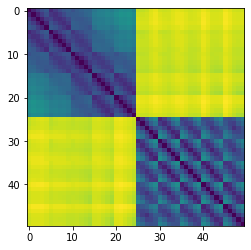

In [690]:
from scipy.spatial.distance import squareform, pdist
plt.imshow(squareform(pdist(results['all_y_hidden'][1,:,:])))

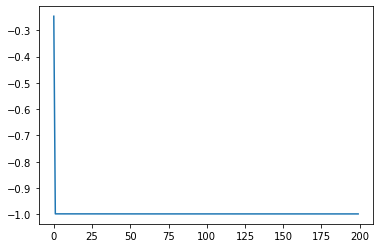

In [687]:
plt.plot(results['w_context_corr'])

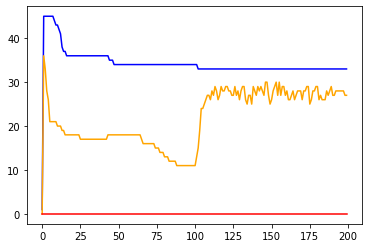

In [688]:
plt.plot(results['n_only_b'],color='blue')
plt.plot(results['n_only_a'],color='orange')
plt.plot(results['n_dead'],color='red')

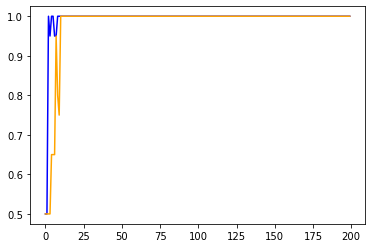

In [679]:
plt.plot(results['acc_1st'],color='blue')
plt.plot(results['acc_2nd'],color='orange')

In [680]:

x = zip(compute_sparsity_stats(results['all_y_hidden'][0,:,:].T))
print(list(x))
x = zip(compute_sparsity_stats(results['all_y_hidden'][1,:,:].T))
print(list(x))

[(0,), (2,), (2,), (0,), (1.1414635,)]
[(27,), (46,), (27,), (19,), (1.4395374,)]


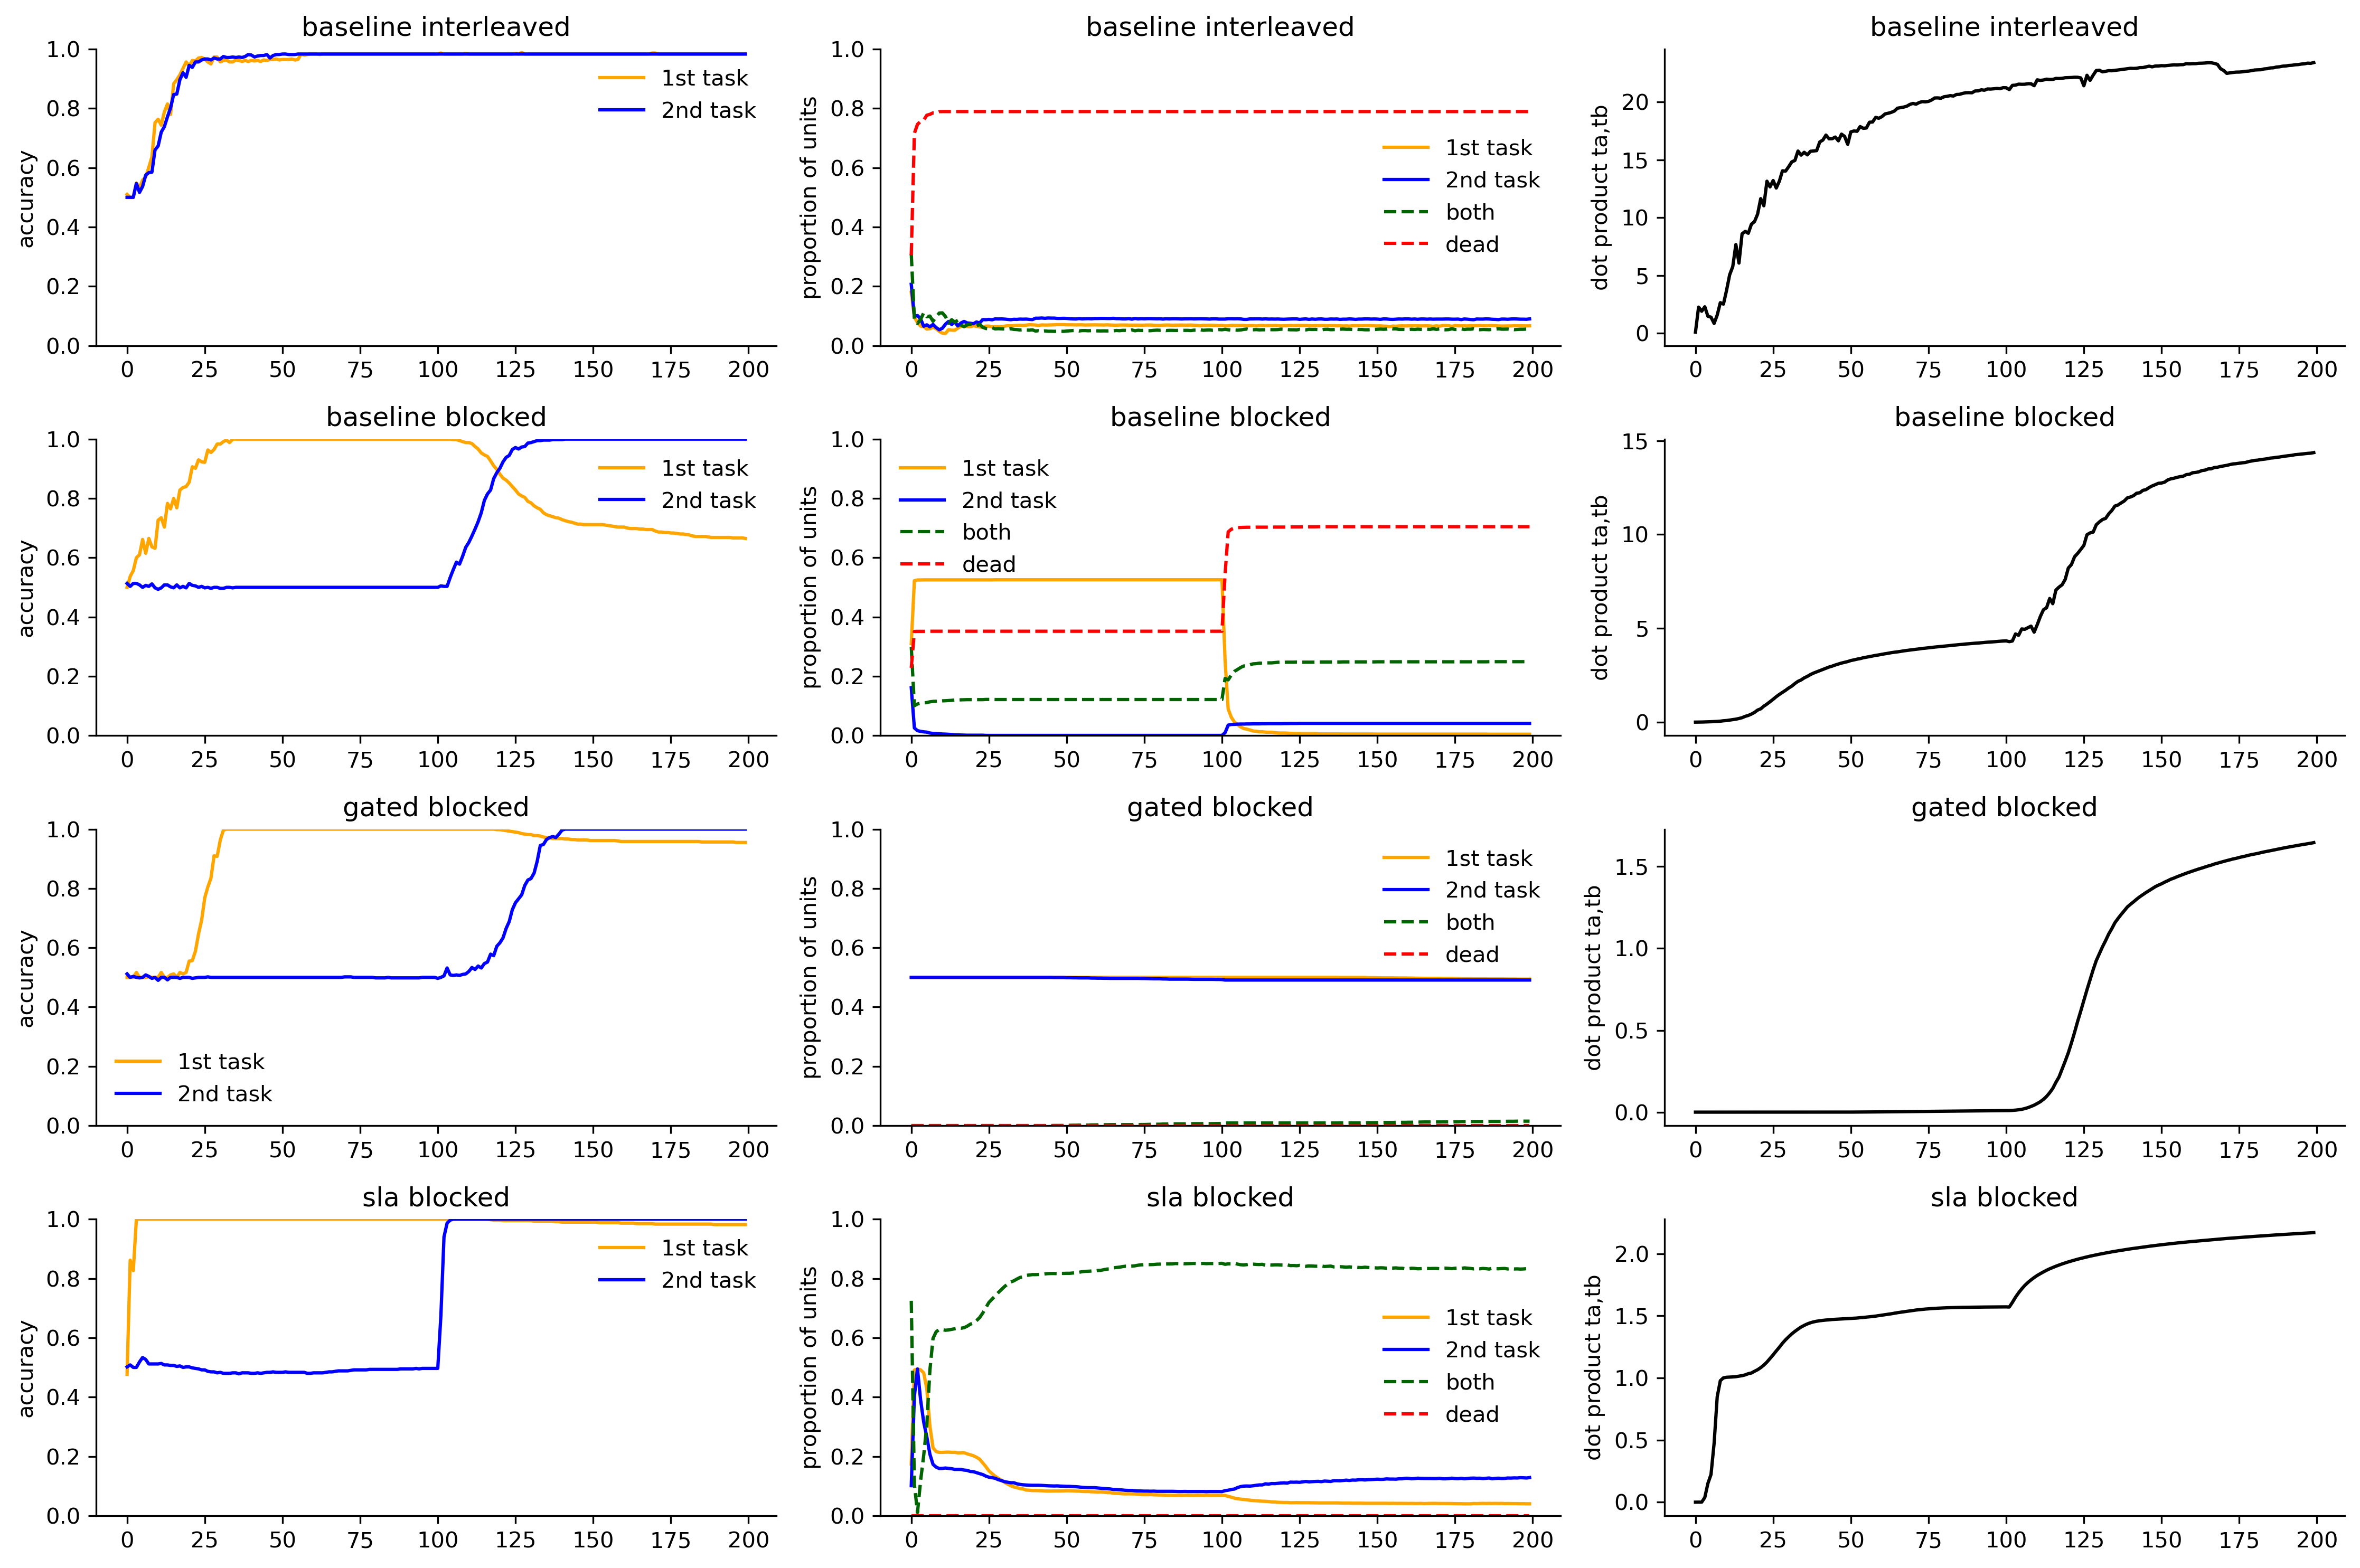

In [47]:
n_runs = 30
models = ['baseline_interleaved', 'baseline_blocked',
          'gated_blocked', 'sla_blocked']
f, axs = plt.subplots(4,3,figsize=(15,10),dpi=300)

for i,m in enumerate(models):
    t_a = np.empty((n_runs,200))
    t_b = np.empty((n_runs,200))
    t_d = np.empty((n_runs,200))
    t_mixed = np.empty((n_runs,200))
    acc_1st = np.empty((n_runs,200))
    acc_2nd = np.empty((n_runs,200))
    dotprod = np.empty((n_runs,200))

    for r in range(n_runs):
        with open('checkpoints/'+m+'/run_'+str(r)+'/results.pkl', 'rb') as f:
            results = pickle.load(f)
            t_a[r,:] = results['n_only_a']/100
            t_b[r,:] = results['n_only_b']/100
            t_d[r,:] = results['n_dead']/100
            t_mixed[r,:] = 1-t_a[r,:]-t_b[r,:]-t_d[r,:]
            dotprod[r,:] = results['hidden_dotprod']
            acc_1st[r,:] = results['acc_1st']
            acc_2nd[r,:] = results['acc_2nd']
    
    axs[i,0].plot(np.arange(200),acc_1st.mean(0),color='orange')
    axs[i,0].plot(np.arange(200),acc_2nd.mean(0),color='blue')
    axs[i,0].set_title(m.replace('_',' '))
    axs[i,0].set_ylim([0,1])
    axs[i,0].set(ylabel='accuracy')
    axs[i,0].legend(['1st task','2nd task'],frameon=False)
    sns.despine()

    axs[i,1].plot(np.arange(200),t_b.mean(0),color='orange')
    axs[i,1].plot(np.arange(200),t_a.mean(0),color='blue')
    axs[i,1].plot(np.arange(200),t_mixed.mean(0),color='darkgreen',linestyle='--')
    axs[i,1].plot(np.arange(200),t_d.mean(0),color='red',linestyle='--')
    axs[i,1].set_title(m.replace('_',' '))
    axs[i,1].set_ylim([0,1])
    axs[i,1].set(ylabel='proportion of units')
    axs[i,1].legend(['1st task','2nd task','both','dead'],frameon=False)
    sns.despine()

    axs[i,2].plot(np.arange(200),dotprod.mean(0),color='k')    
    axs[i,2].set_title(m.replace('_',' '))
    
    axs[i,2].set(ylabel='dot product ta,tb')
    
    sns.despine()



plt.tight_layout()